## Import

In [1]:
import pandas as pd
import numpy as np
np.random.seed(2023)
import pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
# pip install yellowbrick
from yellowbrick.cluster.elbow import kelbow_visualizer

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# ignore warnings
import warnings ; warnings.filterwarnings('ignore')

## Read data

In [2]:
symphony_features, chorus_features, voice_features, solo_features, chamber_features = pickle.load(open(f'../data/ClusteringFeatures.pkl','rb'))

## Kmeans

- 교향곡

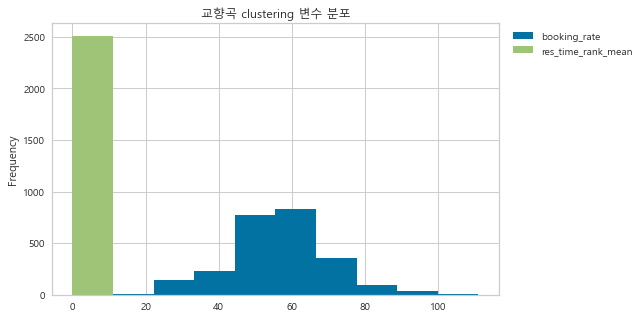

In [3]:
# feature 분포가 다름에 scaling을 진행한다.
symphony_features[['booking_rate','res_time_rank_mean']].plot.hist(title="교향곡 clustering 변수 분포", figsize=(8,5))
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

scaler = MinMaxScaler()
symphony_features[['booking_rate','res_time_rank_mean']] = scaler.fit_transform(symphony_features[['booking_rate','res_time_rank_mean']])

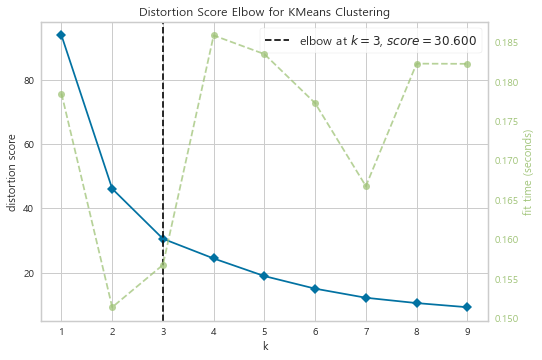

In [4]:
model = KMeans(random_state=2023)
visualizer = kelbow_visualizer(model, symphony_features[['booking_rate','res_time_rank_mean']], k=(1,10))

In [5]:
# n_cluster를 6으로 판단하고 kmeans를 학습시킨다.
model = KMeans(n_clusters=6, random_state=2023)
clusters = model.fit(symphony_features[['booking_rate','res_time_rank_mean']])
symphony_features['cluster'] = clusters.labels_

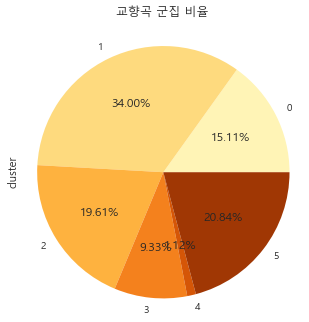

In [6]:
plt.figure(figsize=(3,3))
symphony_features.cluster.value_counts().sort_index()\
.plot.pie(autopct='%.2f%%', figsize=(5,5), legend=False, colors=sns.color_palette("YlOrBr", 6))
plt.title("교향곡 군집 비율\n")
plt.axis('equal') 
plt.show()

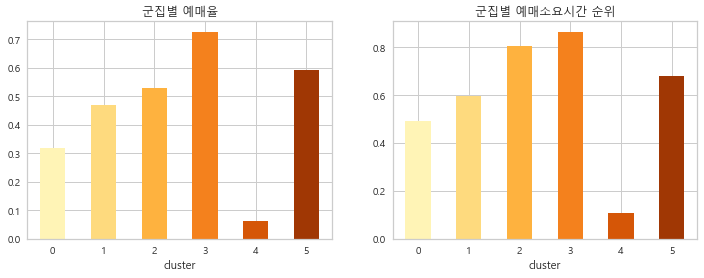

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True)
symphony_features.groupby('cluster')['booking_rate'].mean().plot.bar(title="군집별 예매율", color=sns.color_palette("YlOrBr", 6), ax=ax[0])
symphony_features.groupby('cluster')['res_time_rank_mean'].mean().plot.bar(title="군집별 예매소요시간 순위", color=sns.color_palette("YlOrBr", 6), ax=ax[1])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
plt.show()

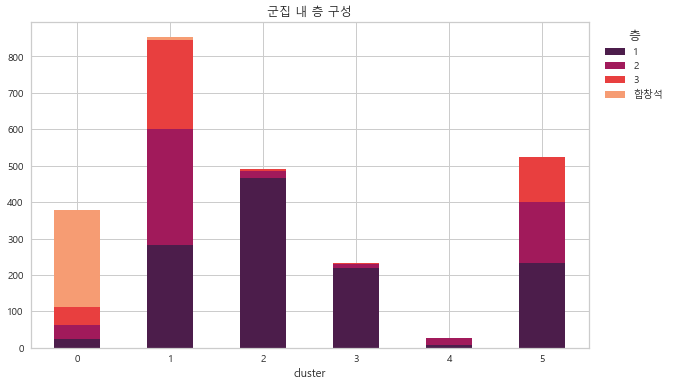

In [8]:
pd.pivot_table(symphony_features, index='cluster', columns='층', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="군집 내 층 구성", figsize=(10,6), stacked=True, color=sns.color_palette("rocket",4))
plt.legend(title="층", bbox_to_anchor=(1.15,1))
plt.xticks(rotation=0)
plt.show()

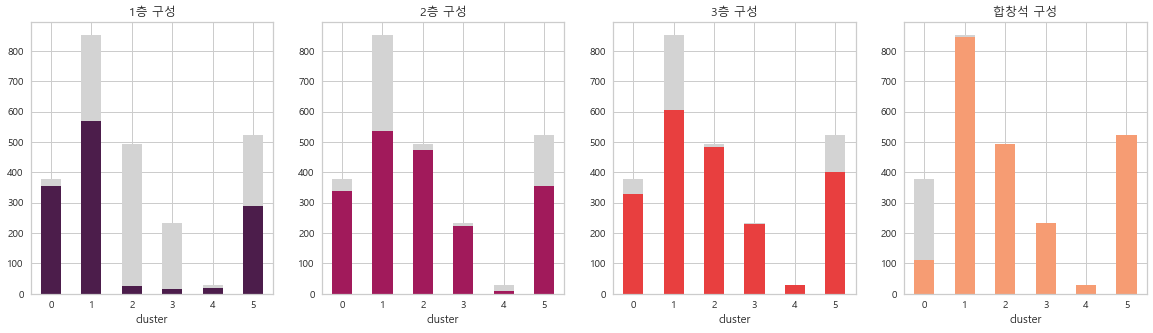

In [9]:
# 층별 구성
fig, ax = plt.subplots(1,4, figsize=(20,5))
pd.pivot_table(symphony_features, index='cluster', columns='층_1', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="1층 구성", color=[sns.color_palette("rocket",4)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(symphony_features, index='cluster', columns='층_2', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="2층 구성", color=[sns.color_palette("rocket",4)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(symphony_features, index='cluster', columns='층_3', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 구성", color=[sns.color_palette("rocket",4)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(symphony_features, index='cluster', columns='층_합창석', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="합창석 구성", color=[sns.color_palette("rocket",4)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
ax[2].set_xticklabels(range(6),rotation=0)
ax[3].set_xticklabels(range(6),rotation=0)
plt.show()

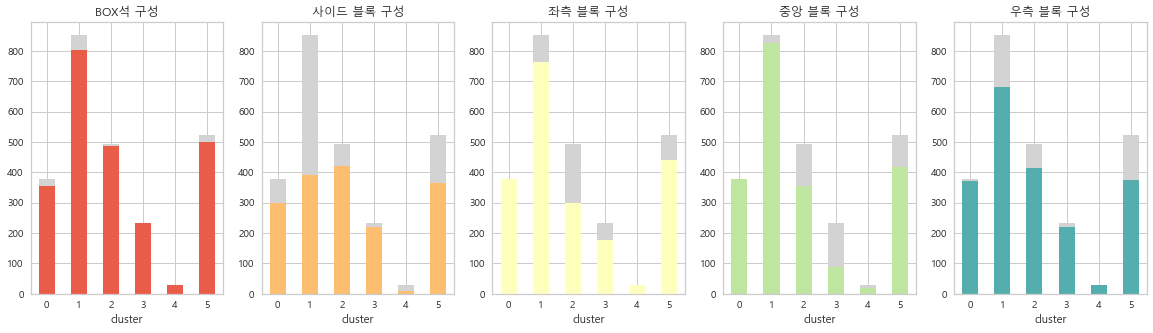

In [10]:
# 블록별 구성
fig, ax = plt.subplots(1,5, figsize=(20,5))
pd.pivot_table(symphony_features, index='cluster', columns='BOX', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="BOX석 구성", color=[sns.color_palette("Spectral",5)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(symphony_features, index='cluster', columns='side_seats', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="사이드 블록 구성", color=[sns.color_palette("Spectral",5)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(symphony_features, index='cluster', columns='left', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="좌측 블록 구성", color=[sns.color_palette("Spectral",5)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(symphony_features, index='cluster', columns='middle', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="중앙 블록 구성", color=[sns.color_palette("Spectral",5)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
pd.pivot_table(symphony_features, index='cluster', columns='right', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="우측 블록 구성", color=[sns.color_palette("Spectral",5)[4], 'lightgray'], stacked=True, legend=False, ax=ax[4])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
ax[2].set_xticklabels(range(6),rotation=0)
ax[3].set_xticklabels(range(6),rotation=0)
ax[4].set_xticklabels(range(6),rotation=0)
plt.show()

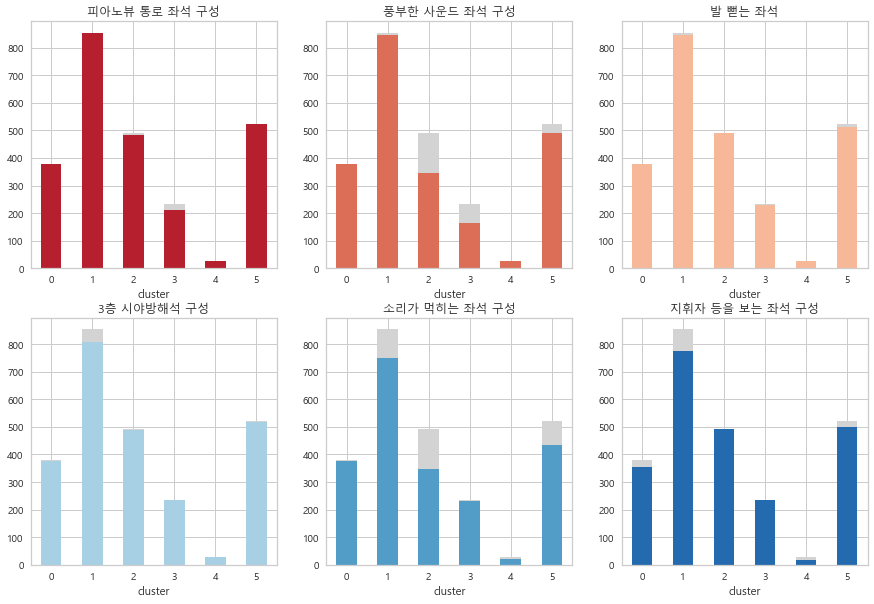

In [11]:
# 관람 특별 좌석 구성
fig, ax = plt.subplots(2,3, figsize=(15,10))
pd.pivot_table(symphony_features, index='cluster', columns='piano_hallway', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="피아노뷰 통로 좌석 구성", color=[sns.color_palette("RdBu",8)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0,0])
pd.pivot_table(symphony_features, index='cluster', columns='sound_quality', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="풍부한 사운드 좌석 구성", color=[sns.color_palette("RdBu",8)[1], 'lightgray'], stacked=True, legend=False, ax=ax[0,1])
pd.pivot_table(symphony_features, index='cluster', columns='leg_free', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="발 뻗는 좌석", color=[sns.color_palette("RdBu",8)[2], 'lightgray'], stacked=True, legend=False, ax=ax[0,2])
pd.pivot_table(symphony_features, index='cluster', columns='3rd_bad', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 시야방해석 구성", color=[sns.color_palette("RdBu",8)[-3], 'lightgray'], stacked=True, legend=False, ax=ax[1,0])
pd.pivot_table(symphony_features, index='cluster', columns='bad_sound', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="소리가 먹히는 좌석 구성", color=[sns.color_palette("RdBu",8)[-2], 'lightgray'], stacked=True, legend=False, ax=ax[1,1])
pd.pivot_table(symphony_features, index='cluster', columns='conductor_back', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="지휘자 등을 보는 좌석 구성", color=[sns.color_palette("RdBu",8)[-1], 'lightgray'], stacked=True, legend=False, ax=ax[1,2])
ax[0,0].set_xticklabels(range(6),rotation=0)
ax[0,1].set_xticklabels(range(6),rotation=0)
ax[0,2].set_xticklabels(range(6),rotation=0)
ax[1,0].set_xticklabels(range(6),rotation=0)
ax[1,1].set_xticklabels(range(6),rotation=0)
ax[1,2].set_xticklabels(range(6),rotation=0)
plt.show()

- 합창

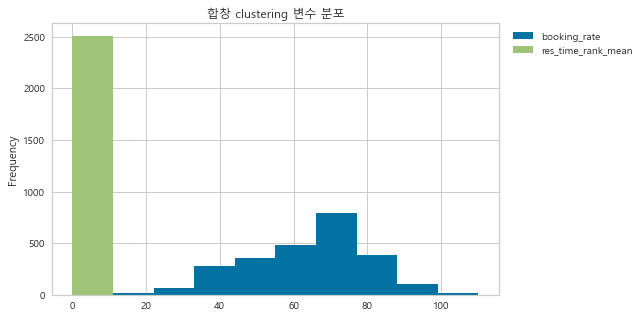

In [12]:
# feature 분포가 다름에 scaling을 진행한다.
chorus_features[['booking_rate','res_time_rank_mean']].plot.hist(title="합창 clustering 변수 분포", figsize=(8,5))
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

scaler = MinMaxScaler()
chorus_features[['booking_rate','res_time_rank_mean']] = scaler.fit_transform(chorus_features[['booking_rate','res_time_rank_mean']].fillna(1))

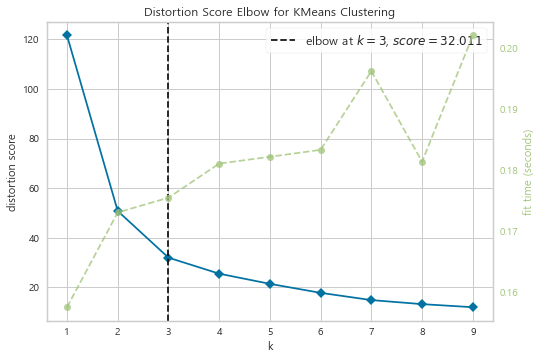

In [13]:
model = KMeans(random_state=2023)
visualizer = kelbow_visualizer(model, chorus_features[['booking_rate','res_time_rank_mean']], k=(1,10))

In [14]:
# n_cluster를 7로 판단하고 kmeans를 학습시킨다.
model = KMeans(n_clusters=7, random_state=2023)
clusters = model.fit(chorus_features[['booking_rate','res_time_rank_mean']])
chorus_features['cluster'] = clusters.labels_

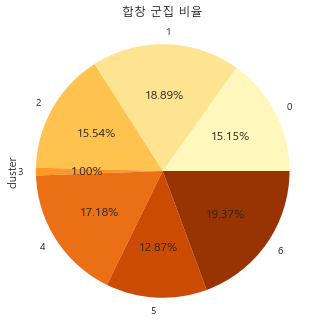

In [15]:
plt.figure(figsize=(3,3))
chorus_features.cluster.value_counts().sort_index()\
.plot.pie(autopct='%.2f%%', figsize=(5,5), legend=False, colors=sns.color_palette("YlOrBr", 7))
plt.title("합창 군집 비율\n")
plt.axis('equal') 
plt.show()

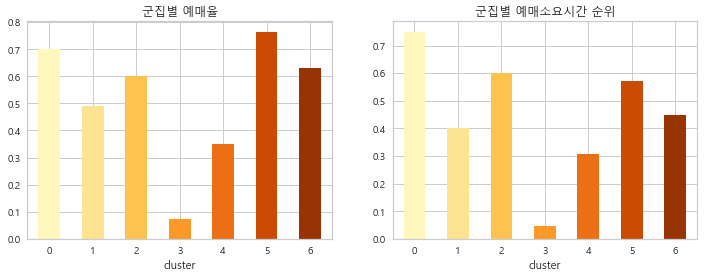

In [16]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True)
chorus_features.groupby('cluster')['booking_rate'].mean().plot.bar(title="군집별 예매율", color=sns.color_palette("YlOrBr", 7), ax=ax[0])
chorus_features.groupby('cluster')['res_time_rank_mean'].mean().plot.bar(title="군집별 예매소요시간 순위", color=sns.color_palette("YlOrBr", 7), ax=ax[1])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
plt.show()

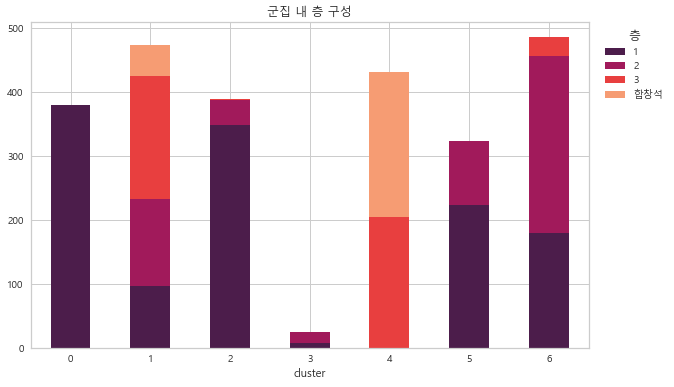

In [17]:
pd.pivot_table(chorus_features, index='cluster', columns='층', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="군집 내 층 구성", figsize=(10,6), stacked=True, color=sns.color_palette("rocket",4))
plt.legend(title="층", bbox_to_anchor=(1.15,1))
plt.xticks(rotation=0)
plt.show()

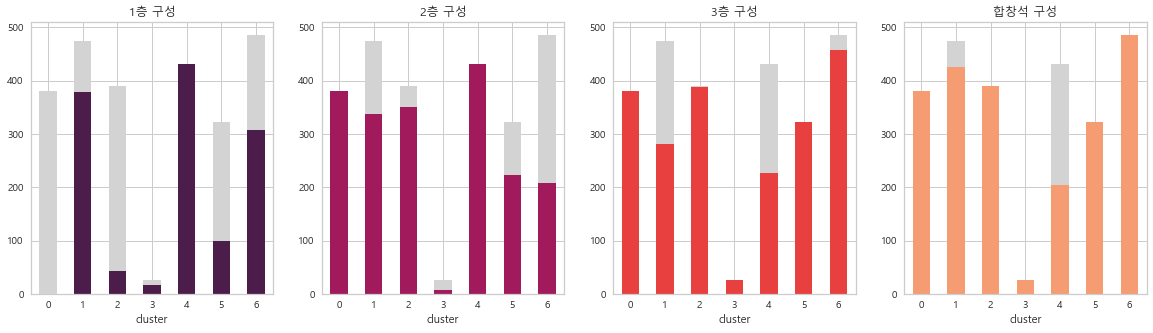

In [18]:
# 층별 구성
fig, ax = plt.subplots(1,4, figsize=(20,5))
pd.pivot_table(chorus_features, index='cluster', columns='층_1', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="1층 구성", color=[sns.color_palette("rocket",4)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(chorus_features, index='cluster', columns='층_2', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="2층 구성", color=[sns.color_palette("rocket",4)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(chorus_features, index='cluster', columns='층_3', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 구성", color=[sns.color_palette("rocket",4)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(chorus_features, index='cluster', columns='층_합창석', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="합창석 구성", color=[sns.color_palette("rocket",4)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
plt.show()

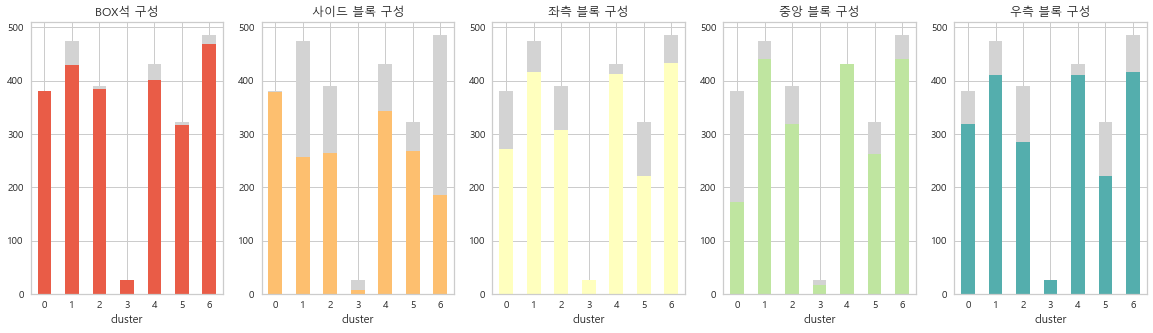

In [19]:
# 블록별 구성
fig, ax = plt.subplots(1,5, figsize=(20,5))
pd.pivot_table(chorus_features, index='cluster', columns='BOX', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="BOX석 구성", color=[sns.color_palette("Spectral",5)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(chorus_features, index='cluster', columns='side_seats', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="사이드 블록 구성", color=[sns.color_palette("Spectral",5)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(chorus_features, index='cluster', columns='left', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="좌측 블록 구성", color=[sns.color_palette("Spectral",5)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(chorus_features, index='cluster', columns='middle', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="중앙 블록 구성", color=[sns.color_palette("Spectral",5)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
pd.pivot_table(chorus_features, index='cluster', columns='right', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="우측 블록 구성", color=[sns.color_palette("Spectral",5)[4], 'lightgray'], stacked=True, legend=False, ax=ax[4])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
ax[4].set_xticklabels(range(7),rotation=0)
plt.show()

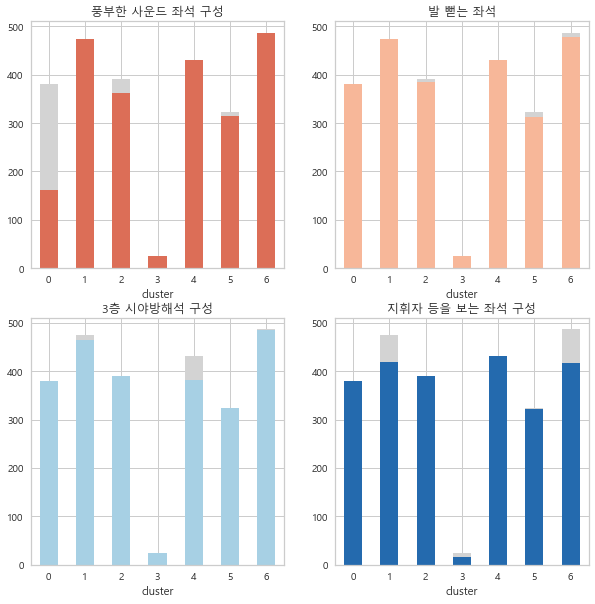

In [20]:
# 관람 특별 좌석 구성
fig, ax = plt.subplots(2,2, figsize=(10,10))
pd.pivot_table(chorus_features, index='cluster', columns='sound_quality', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="풍부한 사운드 좌석 구성", color=[sns.color_palette("RdBu",8)[1], 'lightgray'], stacked=True, legend=False, ax=ax[0,0])
pd.pivot_table(chorus_features, index='cluster', columns='leg_free', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="발 뻗는 좌석", color=[sns.color_palette("RdBu",8)[2], 'lightgray'], stacked=True, legend=False, ax=ax[0,1])
pd.pivot_table(chorus_features, index='cluster', columns='3rd_bad', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 시야방해석 구성", color=[sns.color_palette("RdBu",8)[-3], 'lightgray'], stacked=True, legend=False, ax=ax[1,0])
pd.pivot_table(chorus_features, index='cluster', columns='conductor_back', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="지휘자 등을 보는 좌석 구성", color=[sns.color_palette("RdBu",8)[-1], 'lightgray'], stacked=True, legend=False, ax=ax[1,1])
ax[0,0].set_xticklabels(range(7),rotation=0)
ax[0,1].set_xticklabels(range(7),rotation=0)
ax[1,0].set_xticklabels(range(7),rotation=0)
ax[1,1].set_xticklabels(range(7),rotation=0)
plt.show()

- 성악

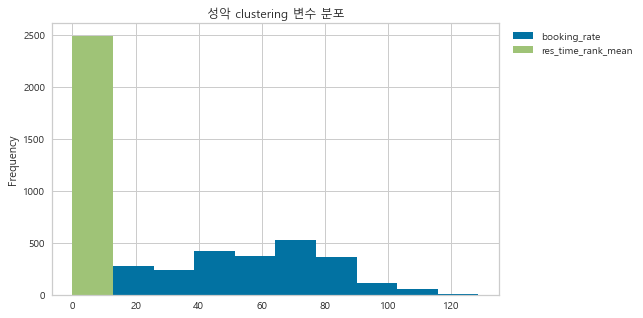

In [21]:
# feature 분포가 다름에 scaling을 진행한다.
voice_features[['booking_rate','res_time_rank_mean']].plot.hist(title="성악 clustering 변수 분포", figsize=(8,5))
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

scaler = MinMaxScaler()
voice_features[['booking_rate','res_time_rank_mean']] = scaler.fit_transform(voice_features[['booking_rate','res_time_rank_mean']].fillna(1))

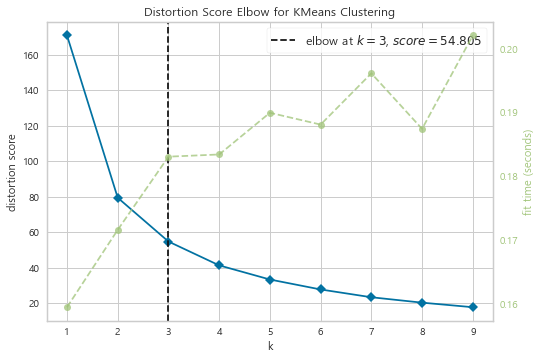

In [22]:
model = KMeans(random_state=2023)
visualizer = kelbow_visualizer(model, voice_features[['booking_rate','res_time_rank_mean']], k=(1,10))

In [23]:
# n_cluster를 7로 판단하고 kmeans를 학습시킨다.
model = KMeans(n_clusters=7, random_state=2023)
clusters = model.fit(voice_features[['booking_rate','res_time_rank_mean']])
voice_features['cluster'] = clusters.labels_

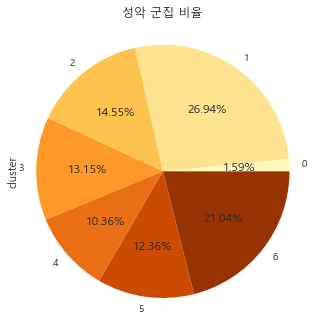

In [24]:
plt.figure(figsize=(3,3))
voice_features.cluster.value_counts().sort_index()\
.plot.pie(autopct='%.2f%%', figsize=(5,5), legend=False, colors=sns.color_palette("YlOrBr", 7))
plt.title("성악 군집 비율\n")
plt.axis('equal') 
plt.show()

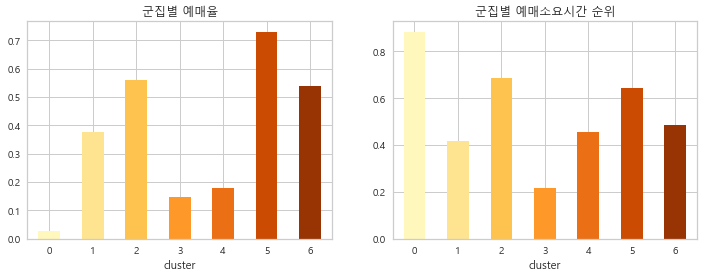

In [25]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True)
voice_features.groupby('cluster')['booking_rate'].mean().plot.bar(title="군집별 예매율", color=sns.color_palette("YlOrBr", 7), ax=ax[0])
voice_features.groupby('cluster')['res_time_rank_mean'].mean().plot.bar(title="군집별 예매소요시간 순위", color=sns.color_palette("YlOrBr", 7), ax=ax[1])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
plt.show()

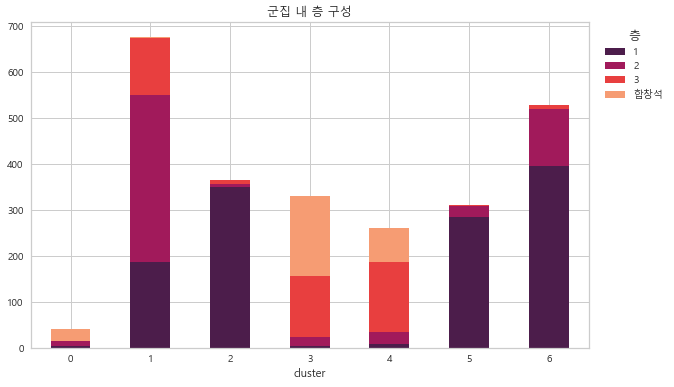

In [26]:
pd.pivot_table(voice_features, index='cluster', columns='층', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="군집 내 층 구성", figsize=(10,6), stacked=True, color=sns.color_palette("rocket",4))
plt.legend(title="층", bbox_to_anchor=(1.15,1))
plt.xticks(rotation=0)
plt.show()

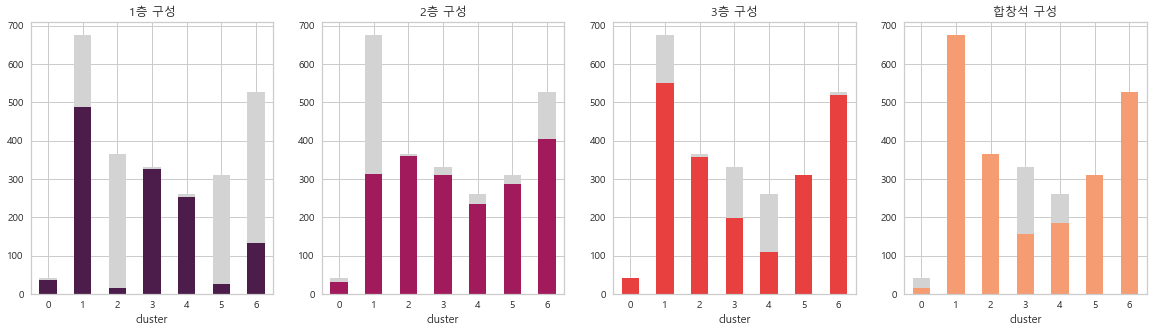

In [27]:
# 층별 구성
fig, ax = plt.subplots(1,4, figsize=(20,5))
pd.pivot_table(voice_features, index='cluster', columns='층_1', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="1층 구성", color=[sns.color_palette("rocket",4)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(voice_features, index='cluster', columns='층_2', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="2층 구성", color=[sns.color_palette("rocket",4)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(voice_features, index='cluster', columns='층_3', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 구성", color=[sns.color_palette("rocket",4)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(voice_features, index='cluster', columns='층_합창석', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="합창석 구성", color=[sns.color_palette("rocket",4)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
plt.show()

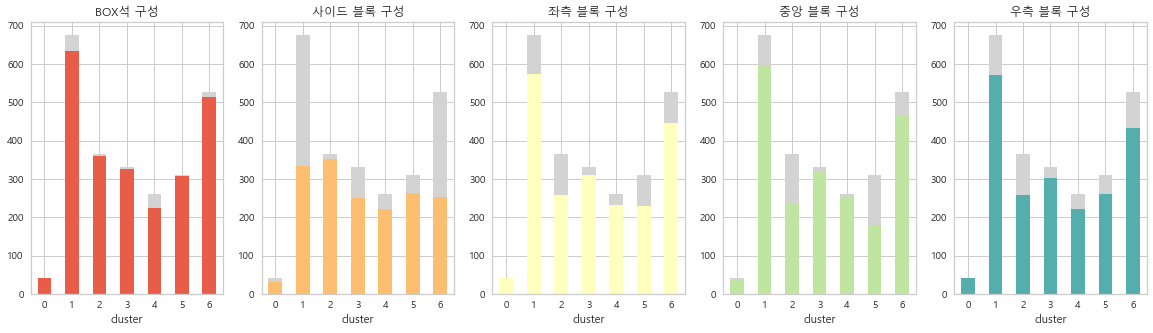

In [28]:
# 블록별 구성
fig, ax = plt.subplots(1,5, figsize=(20,5))
pd.pivot_table(voice_features, index='cluster', columns='BOX', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="BOX석 구성", color=[sns.color_palette("Spectral",5)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(voice_features, index='cluster', columns='side_seats', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="사이드 블록 구성", color=[sns.color_palette("Spectral",5)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(voice_features, index='cluster', columns='left', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="좌측 블록 구성", color=[sns.color_palette("Spectral",5)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(voice_features, index='cluster', columns='middle', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="중앙 블록 구성", color=[sns.color_palette("Spectral",5)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
pd.pivot_table(voice_features, index='cluster', columns='right', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="우측 블록 구성", color=[sns.color_palette("Spectral",5)[4], 'lightgray'], stacked=True, legend=False, ax=ax[4])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
ax[4].set_xticklabels(range(7),rotation=0)
plt.show()

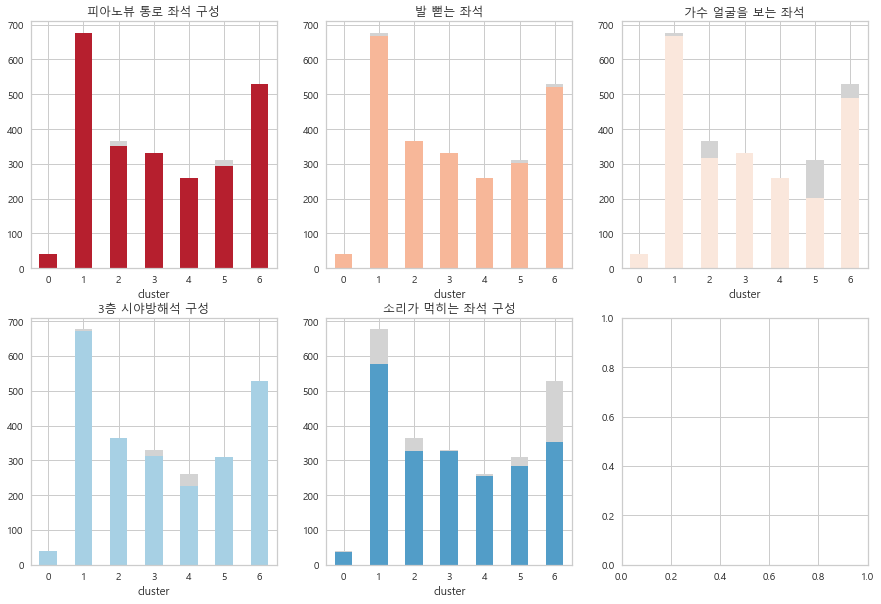

In [29]:
# 관람 특별 좌석 구성
fig, ax = plt.subplots(2,3, figsize=(15,10))
pd.pivot_table(voice_features, index='cluster', columns='piano_hallway', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="피아노뷰 통로 좌석 구성", color=[sns.color_palette("RdBu",8)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0,0])
pd.pivot_table(voice_features, index='cluster', columns='leg_free', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="발 뻗는 좌석", color=[sns.color_palette("RdBu",8)[2], 'lightgray'], stacked=True, legend=False, ax=ax[0,1])
pd.pivot_table(voice_features, index='cluster', columns='singer_face', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="가수 얼굴을 보는 좌석", color=[sns.color_palette("RdBu",8)[3], 'lightgray'], stacked=True, legend=False, ax=ax[0,2])
pd.pivot_table(voice_features, index='cluster', columns='3rd_bad', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 시야방해석 구성", color=[sns.color_palette("RdBu",8)[-3], 'lightgray'], stacked=True, legend=False, ax=ax[1,0])
pd.pivot_table(voice_features, index='cluster', columns='bad_sound', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="소리가 먹히는 좌석 구성", color=[sns.color_palette("RdBu",8)[-2], 'lightgray'], stacked=True, legend=False, ax=ax[1,1])
ax[0,0].set_xticklabels(range(7),rotation=0)
ax[0,1].set_xticklabels(range(7),rotation=0)
ax[0,2].set_xticklabels(range(7),rotation=0)
ax[1,0].set_xticklabels(range(7),rotation=0)
ax[1,1].set_xticklabels(range(7),rotation=0)
plt.show()

- 독주

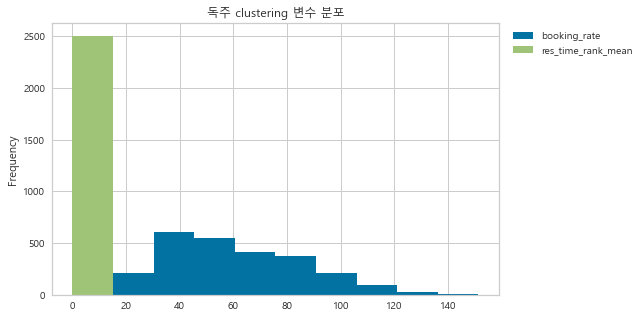

In [30]:
# feature 분포가 다름에 scaling을 진행한다.
solo_features[['booking_rate','res_time_rank_mean']].plot.hist(title="독주 clustering 변수 분포", figsize=(8,5))
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

scaler = MinMaxScaler()
solo_features[['booking_rate','res_time_rank_mean']] = scaler.fit_transform(solo_features[['booking_rate','res_time_rank_mean']].fillna(1))

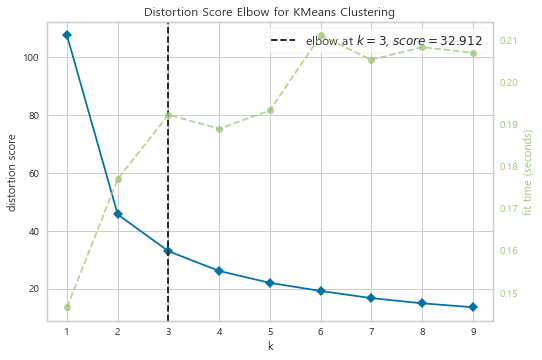

In [31]:
model = KMeans(random_state=2023)
visualizer = kelbow_visualizer(model, solo_features[['booking_rate','res_time_rank_mean']], k=(1,10))

In [32]:
# n_cluster를 7로 판단하고 kmeans를 학습시킨다.
model = KMeans(n_clusters=7, random_state=2023)
clusters = model.fit(solo_features[['booking_rate','res_time_rank_mean']])
solo_features['cluster'] = clusters.labels_

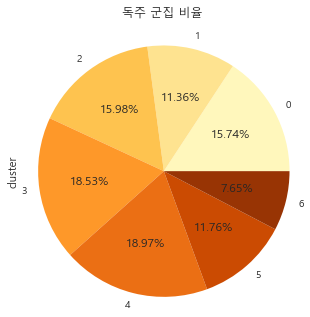

In [33]:
plt.figure(figsize=(3,3))
solo_features.cluster.value_counts().sort_index()\
.plot.pie(autopct='%.2f%%', figsize=(5,5), legend=False, colors=sns.color_palette("YlOrBr", 7))
plt.title("독주 군집 비율\n")
plt.axis('equal') 
plt.show()

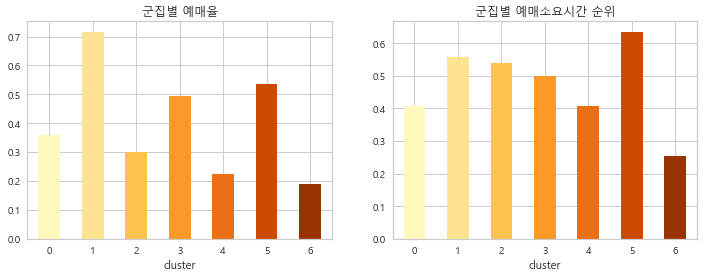

In [34]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True)
solo_features.groupby('cluster')['booking_rate'].mean().plot.bar(title="군집별 예매율", color=sns.color_palette("YlOrBr", 7), ax=ax[0])
solo_features.groupby('cluster')['res_time_rank_mean'].mean().plot.bar(title="군집별 예매소요시간 순위", color=sns.color_palette("YlOrBr", 7), ax=ax[1])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
plt.show()

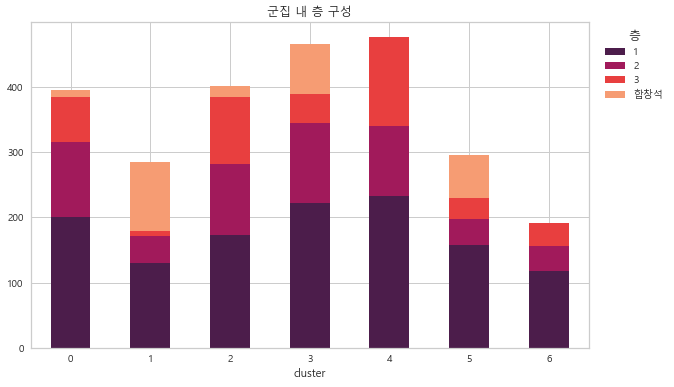

In [35]:
pd.pivot_table(solo_features, index='cluster', columns='층', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="군집 내 층 구성", figsize=(10,6), stacked=True, color=sns.color_palette("rocket",4))
plt.legend(title="층", bbox_to_anchor=(1.15,1))
plt.xticks(rotation=0)
plt.show()

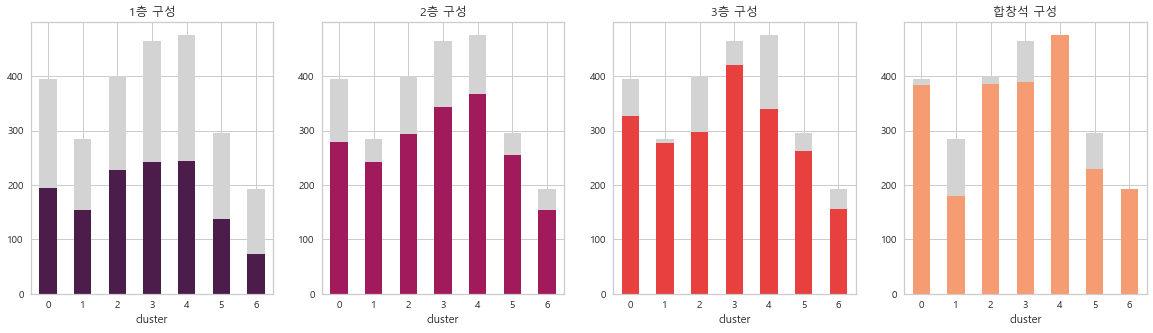

In [36]:
# 층별 구성
fig, ax = plt.subplots(1,4, figsize=(20,5))
pd.pivot_table(solo_features, index='cluster', columns='층_1', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="1층 구성", color=[sns.color_palette("rocket",4)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(solo_features, index='cluster', columns='층_2', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="2층 구성", color=[sns.color_palette("rocket",4)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(solo_features, index='cluster', columns='층_3', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 구성", color=[sns.color_palette("rocket",4)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(solo_features, index='cluster', columns='층_합창석', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="합창석 구성", color=[sns.color_palette("rocket",4)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
plt.show()

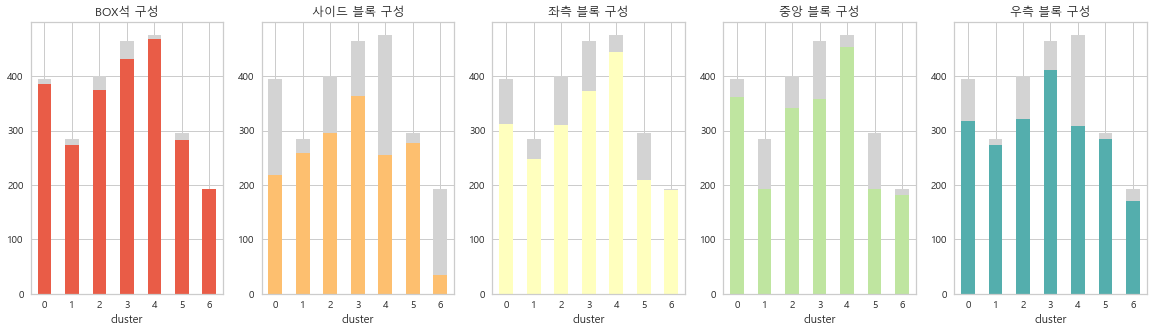

In [37]:
# 블록별 구성
fig, ax = plt.subplots(1,5, figsize=(20,5))
pd.pivot_table(solo_features, index='cluster', columns='BOX', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="BOX석 구성", color=[sns.color_palette("Spectral",5)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(solo_features, index='cluster', columns='side_seats', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="사이드 블록 구성", color=[sns.color_palette("Spectral",5)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(solo_features, index='cluster', columns='left', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="좌측 블록 구성", color=[sns.color_palette("Spectral",5)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(solo_features, index='cluster', columns='middle', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="중앙 블록 구성", color=[sns.color_palette("Spectral",5)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
pd.pivot_table(solo_features, index='cluster', columns='right', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="우측 블록 구성", color=[sns.color_palette("Spectral",5)[4], 'lightgray'], stacked=True, legend=False, ax=ax[4])
ax[0].set_xticklabels(range(7),rotation=0)
ax[1].set_xticklabels(range(7),rotation=0)
ax[2].set_xticklabels(range(7),rotation=0)
ax[3].set_xticklabels(range(7),rotation=0)
ax[4].set_xticklabels(range(7),rotation=0)
plt.show()

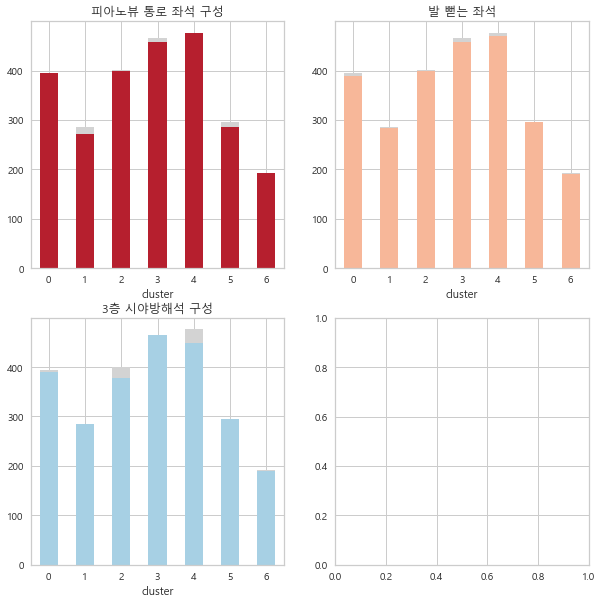

In [38]:
# 관람 특별 좌석 구성
fig, ax = plt.subplots(2,2, figsize=(10,10))
pd.pivot_table(solo_features, index='cluster', columns='piano_hallway', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="피아노뷰 통로 좌석 구성", color=[sns.color_palette("RdBu",8)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0,0])
pd.pivot_table(solo_features, index='cluster', columns='leg_free', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="발 뻗는 좌석", color=[sns.color_palette("RdBu",8)[2], 'lightgray'], stacked=True, legend=False, ax=ax[0,1])
pd.pivot_table(solo_features, index='cluster', columns='3rd_bad', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 시야방해석 구성", color=[sns.color_palette("RdBu",8)[-3], 'lightgray'], stacked=True, legend=False, ax=ax[1,0])
ax[0,0].set_xticklabels(range(7),rotation=0)
ax[0,1].set_xticklabels(range(7),rotation=0)
ax[1,0].set_xticklabels(range(7),rotation=0)
plt.show()

- 실내악

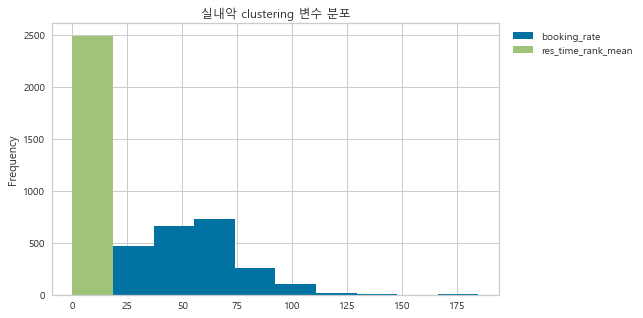

In [39]:
# feature 분포가 다름에 scaling을 진행한다.
chamber_features[['booking_rate','res_time_rank_mean']].plot.hist(title="실내악 clustering 변수 분포", figsize=(8,5))
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

scaler = MinMaxScaler()
chamber_features[['booking_rate','res_time_rank_mean']] = scaler.fit_transform(chamber_features[['booking_rate','res_time_rank_mean']].fillna(1))

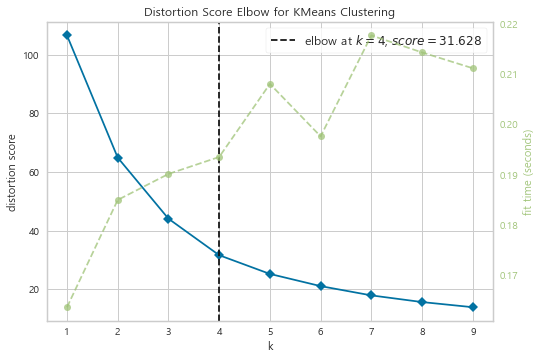

In [40]:
model = KMeans(random_state=2023)
visualizer = kelbow_visualizer(model, chamber_features[['booking_rate','res_time_rank_mean']], k=(1,10))

In [41]:
# n_cluster를 6으로 판단하고 kmeans를 학습시킨다.
model = KMeans(n_clusters=6, random_state=2023)
clusters = model.fit(chamber_features[['booking_rate','res_time_rank_mean']])
chamber_features['cluster'] = clusters.labels_

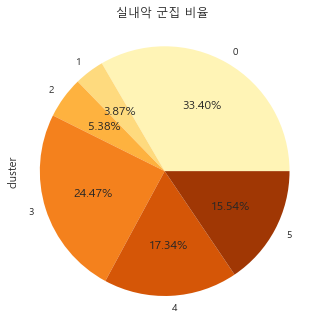

In [42]:
plt.figure(figsize=(3,3))
chamber_features.cluster.value_counts().sort_index()\
.plot.pie(autopct='%.2f%%', figsize=(5,5), legend=False, colors=sns.color_palette("YlOrBr", 6))
plt.title("실내악 군집 비율\n")
plt.axis('equal') 
plt.show()

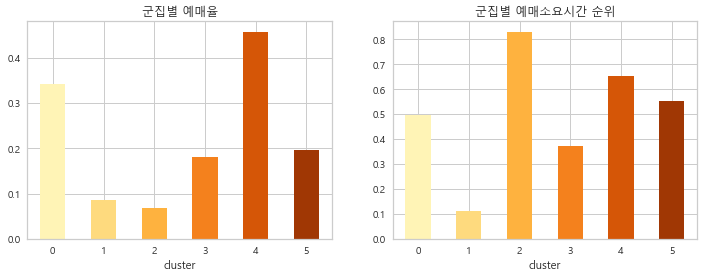

In [43]:
fig, ax = plt.subplots(1,2,figsize=(12,4),sharex=True)
chamber_features.groupby('cluster')['booking_rate'].mean().plot.bar(title="군집별 예매율", color=sns.color_palette("YlOrBr", 6), ax=ax[0])
chamber_features.groupby('cluster')['res_time_rank_mean'].mean().plot.bar(title="군집별 예매소요시간 순위", color=sns.color_palette("YlOrBr", 6), ax=ax[1])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
plt.show()

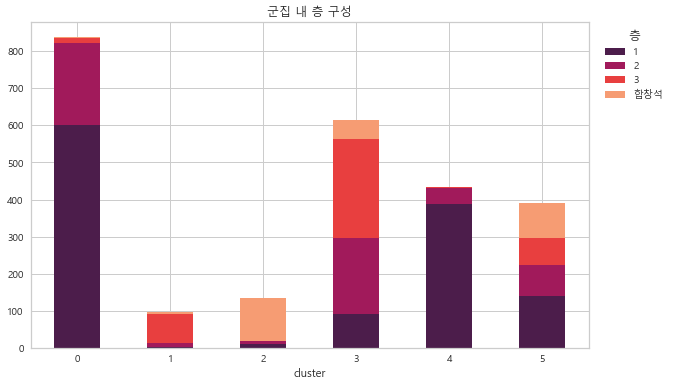

In [44]:
pd.pivot_table(chamber_features, index='cluster', columns='층', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="군집 내 층 구성", figsize=(10,6), stacked=True, color=sns.color_palette("rocket",4))
plt.legend(title="층", bbox_to_anchor=(1.15,1))
plt.xticks(rotation=0)
plt.show()

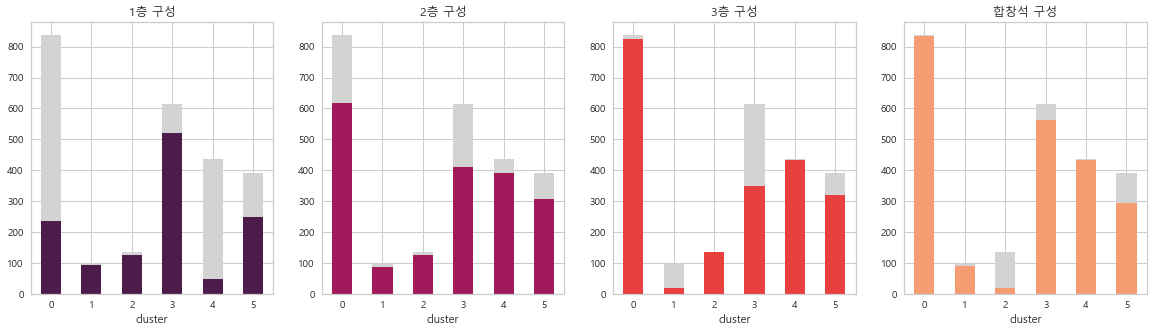

In [45]:
# 층별 구성
fig, ax = plt.subplots(1,4, figsize=(20,5))
pd.pivot_table(chamber_features, index='cluster', columns='층_1', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="1층 구성", color=[sns.color_palette("rocket",4)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(chamber_features, index='cluster', columns='층_2', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="2층 구성", color=[sns.color_palette("rocket",4)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(chamber_features, index='cluster', columns='층_3', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 구성", color=[sns.color_palette("rocket",4)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(chamber_features, index='cluster', columns='층_합창석', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="합창석 구성", color=[sns.color_palette("rocket",4)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
ax[2].set_xticklabels(range(6),rotation=0)
ax[3].set_xticklabels(range(6),rotation=0)
plt.show()

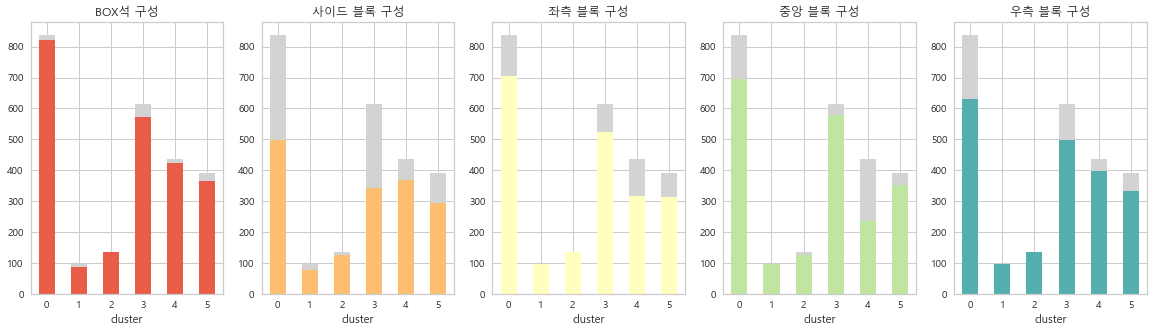

In [46]:
# 블록별 구성
fig, ax = plt.subplots(1,5, figsize=(20,5))
pd.pivot_table(chamber_features, index='cluster', columns='BOX', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="BOX석 구성", color=[sns.color_palette("Spectral",5)[0], 'lightgray'], stacked=True, legend=False, ax=ax[0])
pd.pivot_table(chamber_features, index='cluster', columns='side_seats', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="사이드 블록 구성", color=[sns.color_palette("Spectral",5)[1], 'lightgray'], stacked=True, legend=False, ax=ax[1])
pd.pivot_table(chamber_features, index='cluster', columns='left', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="좌측 블록 구성", color=[sns.color_palette("Spectral",5)[2], 'lightgray'], stacked=True, legend=False, ax=ax[2])
pd.pivot_table(chamber_features, index='cluster', columns='middle', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="중앙 블록 구성", color=[sns.color_palette("Spectral",5)[3], 'lightgray'], stacked=True, legend=False, ax=ax[3])
pd.pivot_table(chamber_features, index='cluster', columns='right', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="우측 블록 구성", color=[sns.color_palette("Spectral",5)[4], 'lightgray'], stacked=True, legend=False, ax=ax[4])
ax[0].set_xticklabels(range(6),rotation=0)
ax[1].set_xticklabels(range(6),rotation=0)
ax[2].set_xticklabels(range(6),rotation=0)
ax[3].set_xticklabels(range(6),rotation=0)
ax[4].set_xticklabels(range(6),rotation=0)
plt.show()

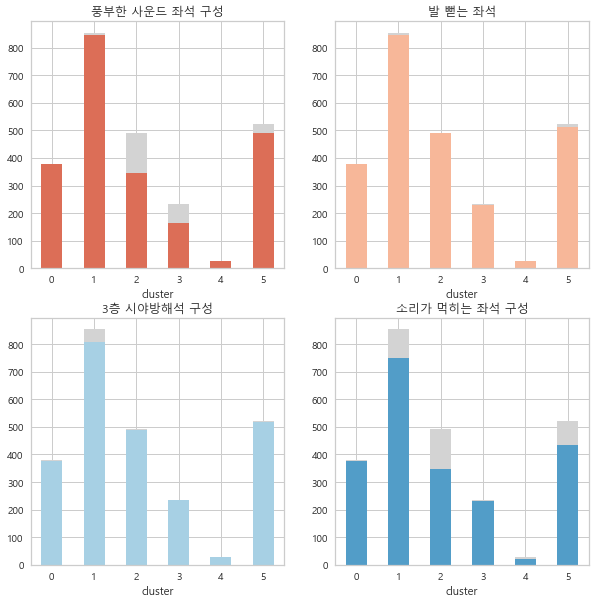

In [47]:
# 관람 특별 좌석 구성
fig, ax = plt.subplots(2,2, figsize=(10,10))
pd.pivot_table(symphony_features, index='cluster', columns='sound_quality', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="풍부한 사운드 좌석 구성", color=[sns.color_palette("RdBu",8)[1], 'lightgray'], stacked=True, legend=False, ax=ax[0,0])
pd.pivot_table(symphony_features, index='cluster', columns='leg_free', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="발 뻗는 좌석", color=[sns.color_palette("RdBu",8)[2], 'lightgray'], stacked=True, legend=False, ax=ax[0,1])
pd.pivot_table(symphony_features, index='cluster', columns='3rd_bad', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="3층 시야방해석 구성", color=[sns.color_palette("RdBu",8)[-3], 'lightgray'], stacked=True, legend=False, ax=ax[1,0])
pd.pivot_table(symphony_features, index='cluster', columns='bad_sound', values='row_ratio', aggfunc=np.size, fill_value=0)\
.plot.bar(title="소리가 먹히는 좌석 구성", color=[sns.color_palette("RdBu",8)[-2], 'lightgray'], stacked=True, legend=False, ax=ax[1,1])
ax[0,0].set_xticklabels(range(6),rotation=0)
ax[0,1].set_xticklabels(range(6),rotation=0)
ax[1,0].set_xticklabels(range(6),rotation=0)
ax[1,1].set_xticklabels(range(6),rotation=0)
plt.show()

## Save data

In [48]:
pickle.dump((symphony_features, chorus_features, voice_features, solo_features, chamber_features), 
            open(f'../data/ClusteringResult.pkl', 'wb'))